In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("Data_1.csv")

In [6]:
df.head()

,Transaction_Date,Store_Number,Loyalty_Card_Number,Transaction_ID,Product_Number,Product_Name,Product_Quantity,Total_Sales,Weight,Brand,Flavour,Category,Lifestage,Premium_Customer,Day,Month,Month_Name,Year,Day_of_Week,Weekend_Flag
0,2023-01-01,269,269175,266094,28,Thins Potato Chips Hot & Spicy 175g,2,6.6,175,Thin Chips,Spicy,Chips,MIDAGE SINGLES/COUPLES,Mainstream,1,1,Jan,2023,Sunday,True
1,2023-01-01,153,153187,152684,28,Thins Potato Chips Hot & Spicy 175g,2,6.6,175,Thin Chips,Spicy,Chips,OLDER FAMILIES,Mainstream,1,1,Jan,2023,Sunday,True
2,2023-01-01,123,123299,127308,28,Thins Potato Chips Hot & Spicy 175g,2,6.6,175,Thin Chips,Spicy,Chips,OLDER SINGLES/COUPLES,Mainstream,1,1,Jan,2023,Sunday,True
3,2023-01-01,238,238186,242612,28,Thins Potato Chips Hot & Spicy 175g,2,6.6,175,Thin Chips,Spicy,Chips,RETIREES,Mainstream,1,1,Jan,2023,Sunday,True
4,2023-01-01,144,144001,143893,28,Thins Potato Chips Hot & Spicy 175g,2,6.6,175,Thin Chips,Spicy,Chips,RETIREES,Mainstream,1,1,Jan,2023,Sunday,True


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72636 entries, 0 to 72635
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Transaction_Date     72636 non-null  object 
 1   Store_Number         72636 non-null  int64  
 2   Loyalty_Card_Number  72636 non-null  int64  
 3   Transaction_ID       72636 non-null  int64  
 4   Product_Number       72636 non-null  int64  
 5   Product_Name         72636 non-null  object 
 6   Product_Quantity     72636 non-null  int64  
 7   Total_Sales          72636 non-null  float64
 8   Weight               72636 non-null  int64  
 9   Brand                72636 non-null  object 
 10  Flavour              72636 non-null  object 
 11  Category             72636 non-null  object 
 12  Lifestage            72636 non-null  object 
 13  Premium_Customer     72636 non-null  object 
 14  Day                  72636 non-null  int64  
 15  Month                72636 non-null 

### Calculate below Key Performance Indicators (Key Metrics)   

##### a. Total Sales

In [11]:
total_sales = df['Total_Sales'].sum()
print(f"Total Sales: {total_sales}")

Total Sales: 514623.9


In [13]:
total_customers = df['Loyalty_Card_Number'].nunique()
print(f"Total Customers: {total_customers}")

Total Customers: 72636


In [14]:
total_quantity_sold = df['Product_Quantity'].sum()
print(f"Total Quantity Sold: {total_quantity_sold}")

Total Quantity Sold: 132080


In [15]:
total_distinct_products_sold = df['Product_Number'].nunique()
print(f"Total Distinct Products Sold: {total_distinct_products_sold}")

Total Distinct Products Sold: 114


In [17]:
transactions_per_customer = df.groupby('Loyalty_Card_Number')['Transaction_ID'].nunique().mean()
print(f"Transactions per Customer: {transactions_per_customer}")

Transactions per Customer: 1.0


In [18]:
products_sales_per_transaction = df.groupby('Transaction_ID')['Product_Number'].nunique().mean()
print(f"Products Sales per Transaction: {products_sales_per_transaction}")

Products Sales per Transaction: 1.0


In [20]:
average_price_per_unit = (df['Total_Sales'] / df['Product_Quantity']).mean()
print(f"Average Price per Unit: {average_price_per_unit}")

Average Price per Unit: 3.8740590065532245


In [21]:
average_sales_per_customer = df.groupby('Loyalty_Card_Number')['Total_Sales'].sum().mean()
print(f"Average Sales per Customer: {average_sales_per_customer}")

Average Sales per Customer: 7.084970262679663


In [23]:
##  weight is in grams as per initial data  
total_weighted_sales_tons = (df['Weight'].sum()) / 1000 
print(f"Total Weighted Sales (in tons): {total_weighted_sales_tons}")

Total Weighted Sales (in tons): 13282.419


In [25]:
total_distinct_stores = df['Store_Number'].nunique()
print(f"Total Distinct Number of Stores: {total_distinct_stores}")

Total Distinct Number of Stores: 272


In [26]:
total_distinct_categories_sold = df['Category'].nunique()
print(f"Total Distinct Number of Categories Sold: {total_distinct_categories_sold}")

Total Distinct Number of Categories Sold: 20


In [27]:
total_distinct_flavours_sold = df['Flavour'].nunique()
print(f"Total Distinct Number of Flavours Sold: {total_distinct_flavours_sold}")

Total Distinct Number of Flavours Sold: 82


In [28]:
total_distinct_brands_sold = df['Brand'].nunique()
print(f"Total Distinct Number of Brands Sold: {total_distinct_brands_sold}")

Total Distinct Number of Brands Sold: 31


In [30]:
chips_kettle_transactions = df[df['Category'].isin(['Chips', 'Kettle'])]['Transaction_ID'].nunique()
print(f"Total Transactions Related to Categories 'Chips' and 'Kettle': {chips_kettle_transactions}")

Total Transactions Related to Categories 'Chips' and 'Kettle': 30235


#### a. Total Sales & Percentage of Sales by Brand

In [47]:
brand_sales = df.groupby('Brand')['Total_Sales'].sum().reset_index()
brand_sales['Percentage_of_Sales'] = (brand_sales['Total_Sales'] / brand_sales['Total_Sales'].sum()) * 100

brand_sales

,Brand,Total_Sales,Percentage_of_Sales
0,Burger Rings,1531.8,0.297654
1,CCs Cheese,4256.7,0.827148
2,Cheetos Puffs,4102.9,0.797262
3,Cheezels Cheese,10801.2,2.098853
4,Cobs Chips,19292.6,3.748874
5,Dorito Corn Chips,10842.0,2.106781
6,Doritos Cheese,9302.4,1.807611
7,Doritos Corn Chips,35402.9,6.879373
8,Doritos Mexicana,7194.0,1.397914
9,Doritos Salsa,3307.2,0.642644


#### b. Visual Representation of Sales Across Different Brands

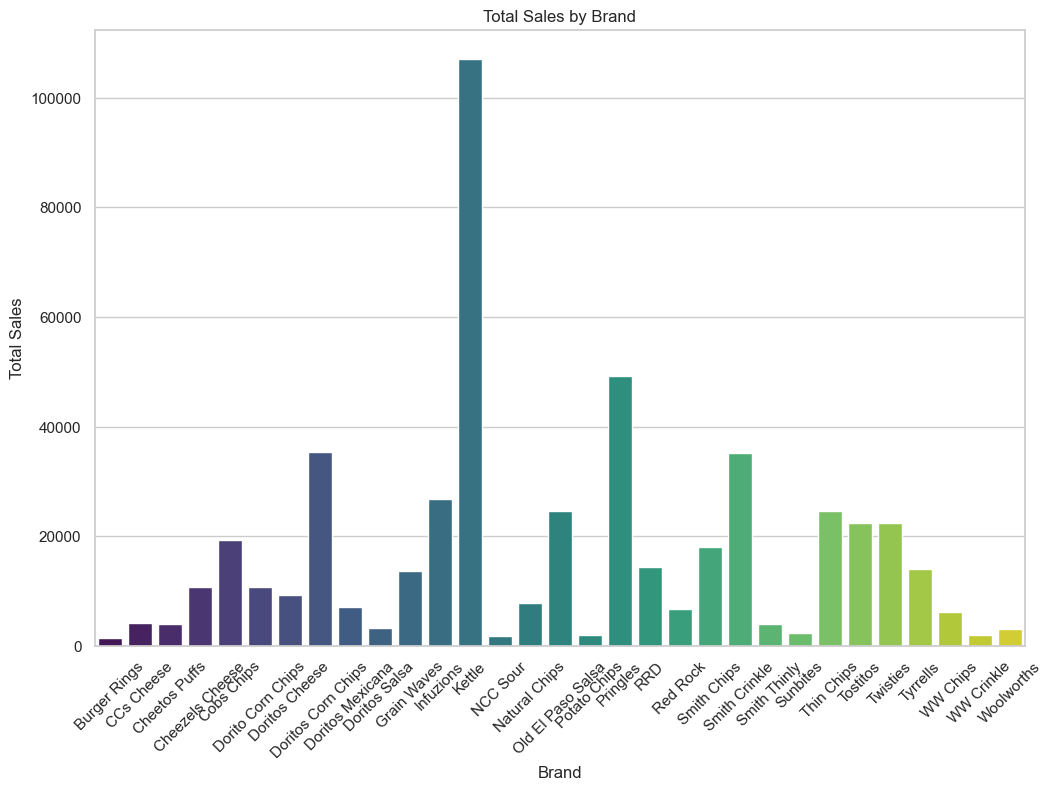

In [46]:
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='Brand', y='Total_Sales', data=brand_sales, palette='viridis')
plt.title('Total Sales by Brand')
plt.xlabel('Brand')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

#### C. Top performing 5 and worst performing 5 Brands based on percentage of sales  

In [48]:
top_5_brands = brand_sales.sort_values('Percentage_of_Sales', ascending=False).head(5)
worst_5_brands = brand_sales.sort_values('Percentage_of_Sales', ascending=True).head(5)

In [49]:
top_5_brands

,Brand,Total_Sales,Percentage_of_Sales
12,Kettle,107014.0,20.794604
17,Pringles,49213.7,9.563042
7,Doritos Corn Chips,35402.9,6.879373
21,Smith Crinkle,35203.2,6.840568
11,Infuzions,26806.4,5.208930


In [50]:
worst_5_brands

,Brand,Total_Sales,Percentage_of_Sales
0,Burger Rings,1531.8,0.297654
13,NCC Sour,1815.0,0.352685
16,Potato Chips,1947.0,0.378335
29,WW Crinkle,1980.5,0.384844
23,Sunbites,2337.5,0.454215


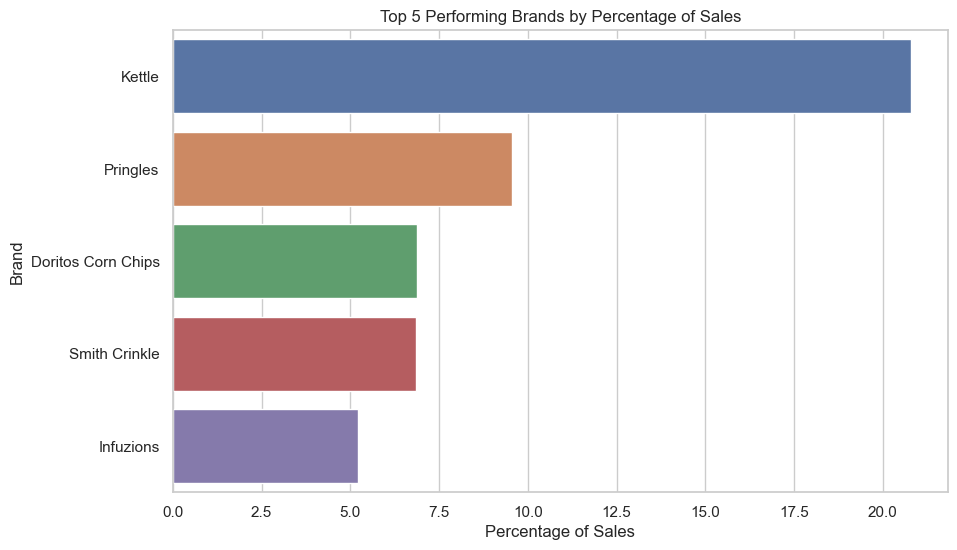

In [52]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Percentage_of_Sales', y='Brand', data=top_5_brands)
plt.title('Top 5 Performing Brands by Percentage of Sales')
plt.xlabel('Percentage of Sales')
plt.ylabel('Brand')
plt.show()

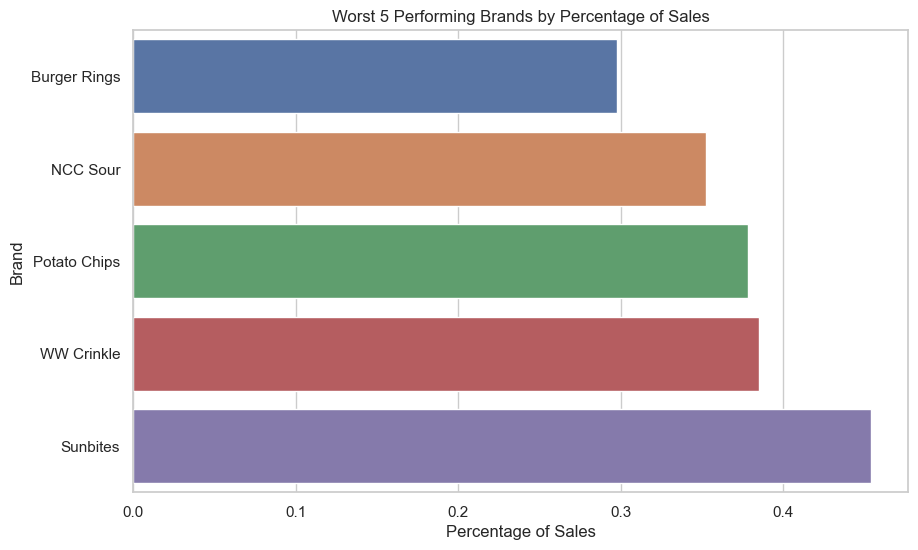

In [53]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Percentage_of_Sales', y='Brand', data=worst_5_brands)
plt.title('Worst 5 Performing Brands by Percentage of Sales')
plt.xlabel('Percentage of Sales')
plt.ylabel('Brand')
plt.show()

#### A tabular format presenting brand-wise analysis of metrics such as total sales, total transactions with this brand, quantity sold, weights sold, etc  (rows - brands, columns - metrics

In [55]:
brand_analysis = df.groupby('Brand').agg(
    Total_Sales=('Total_Sales', 'sum'),
    Total_Transactions=('Transaction_ID', 'nunique'),
    Quantity_Sold=('Product_Quantity', 'sum'),
    Weight_Sold=('Weight', 'sum')
).reset_index()

In [56]:
brand_analysis

,Brand,Total_Sales,Total_Transactions,Quantity_Sold,Weight_Sold
0,Burger Rings,1531.8,382,666,84040
1,CCs Cheese,4256.7,1152,2027,201600
2,Cheetos Puffs,4102.9,769,1343,136610
3,Cheezels Cheese,10801.2,1249,2284,340830
4,Cobs Chips,19292.6,2749,5077,302390
5,Dorito Corn Chips,10842.0,914,1703,347320
6,Doritos Cheese,9302.4,879,1632,290070
7,Doritos Corn Chips,35402.9,4546,8436,736060
8,Doritos Mexicana,7194.0,885,1635,150450
9,Doritos Salsa,3307.2,736,1272,220800


#### Perform below category analysis.    
    a. Total Sales, Total Transactions, Total quantity, Total weight by Category
    b. Which category contributes maximum sales, and its contribution of total sales, its percentage contribution of total sales?
    c. Pareto Analysis (Top categories contributing to 80% of total sales)

In [57]:
category_analysis = df.groupby('Category').agg(
    Total_Sales=('Total_Sales', 'sum'),
    Total_Transactions=('Transaction_ID', 'nunique'),
    Total_Quantity=('Product_Quantity', 'sum'),
    Total_Weight=('Weight', 'sum')
).reset_index()

In [58]:
category_analysis

,Category,Total_Sales,Total_Transactions,Total_Quantity,Total_Weight
0,Cheese,24360.3,3280,5943,832500
1,Chips,124273.7,18503,33620,3395955
2,Crinkle,37183.7,5844,10397,1249180
3,Infuzions,26806.4,3983,7303,422650
4,Kettle,107014.0,11732,21683,1881440
5,Mexicana,7194.0,885,1635,150450
6,Pringles,49213.7,7176,13301,961584
7,Puffs,4102.9,769,1343,136610
8,RRD,14436.9,2872,4993,458115
9,Rings,1531.8,382,666,84040


#### Which category contributes maximum sales, and its contribution of total sales, its percentage contribution of total sales?

In [59]:
category_sales = df.groupby('Category')['Total_Sales'].sum().reset_index()

In [60]:
category_sales

,Category,Total_Sales
0,Cheese,24360.3
1,Chips,124273.7
2,Crinkle,37183.7
3,Infuzions,26806.4
4,Kettle,107014.0
5,Mexicana,7194.0
6,Pringles,49213.7
7,Puffs,4102.9
8,RRD,14436.9
9,Rings,1531.8


In [61]:
total_sales = category_sales['Total_Sales'].sum()
total_sales

514623.9

In [63]:
max_sales_category = category_sales.loc[category_sales['Total_Sales'].idxmax()]
max_sales_category

Category          Chips
Total_Sales    124273.7
Name: 1, dtype: object

In [64]:
max_sales_category['Percentage_of_Total_Sales'] = (max_sales_category['Total_Sales'] / total_sales) * 100
max_sales_category['Percentage_of_Total_Sales'] 

C:\Users\DELL\AppData\Local\Temp\ipykernel_5956\2715542448.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  max_sales_category['Percentage_of_Total_Sales'] = (max_sales_category['Total_Sales'] / total_sales) * 100
C:\Users\DELL\AppData\Local\Temp\ipykernel_5956\2715542448.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  max_sales_category['Percentage_of_Total_Sales'] = (max_sales_category['Total_Sales'] / total_sales) * 100


24.148450936693767

#### Q.  Perform below Customer Category Analysis.  
    a. Sales distribution among different customer categories and visualize the same by choosing right chart - 5Marks
    b. Weight distribution among customer segments and visualize the same by choosing right chart - 5Marks
    c. A tabular format presenting category-wise analysis of metrics such as total sales, total transactions with this brand, quantity sold, weights sold, etc  (rows - categories, columns - metrics) - 5Marks

## a. Sales distribution among different customer categories and visualize the same by choosing right chart
sales_by_customer_category = df.groupby('Lifestage')['Total_Sales'].sum().reset_index()
sales_by_customer_category

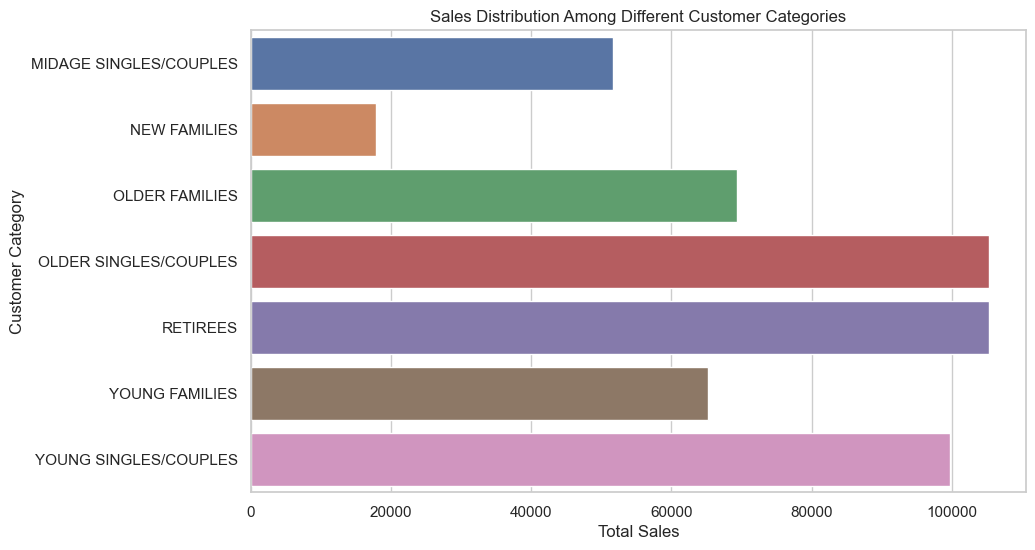

In [76]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Total_Sales', y='Lifestage', data=sales_by_customer_category)
plt.title('Sales Distribution Among Different Customer Categories')
plt.xlabel('Total Sales')
plt.ylabel('Customer Category')
plt.show()

In [78]:
# Weight distribution among customer segments and visualize the same by choosing right chart
weight_by_customer_segment = df.groupby('Lifestage')['Weight'].sum().reset_index()
weight_by_customer_segment

,Lifestage,Weight
0,MIDAGE SINGLES/COUPLES,1332459
1,NEW FAMILIES,463999
2,OLDER FAMILIES,1779937
3,OLDER SINGLES/COUPLES,2669621
4,RETIREES,2709367
5,YOUNG FAMILIES,1679527
6,YOUNG SINGLES/COUPLES,2647509


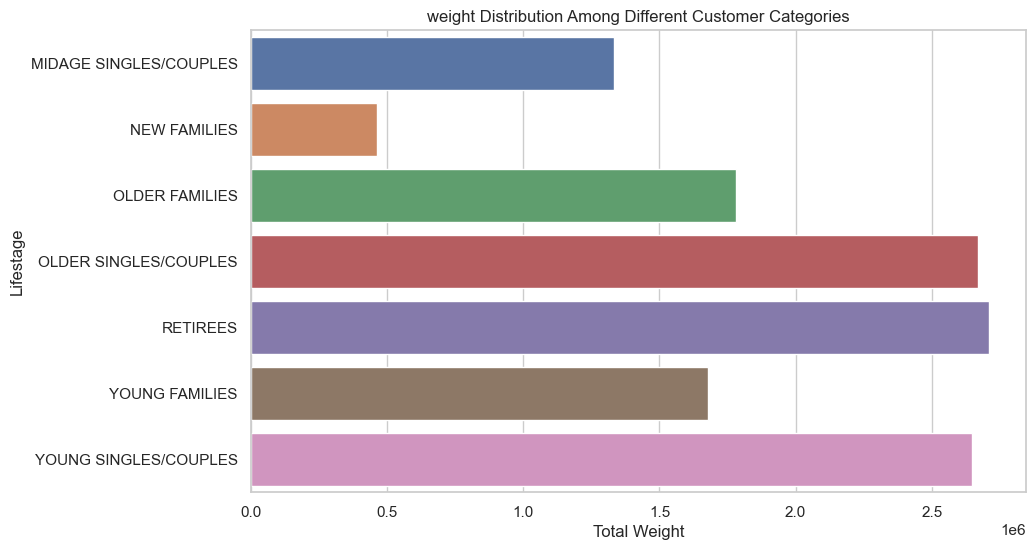

In [79]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Weight', y='Lifestage', data=weight_by_customer_segment)
plt.title('weight Distribution Among Different Customer Categories')
plt.xlabel('Total Weight')
plt.ylabel('Lifestage')
plt.show()

In [81]:
category_analysis = df.groupby('Category').agg(
    Total_Sales=('Total_Sales', 'sum'),
    Total_Transactions=('Transaction_ID', 'nunique'),
    Total_Quantity_Sold=('Product_Quantity', 'sum'),
    Total_Weight_Sold=('Weight', 'sum')
).reset_index()

In [82]:
category_analysis

,Category,Total_Sales,Total_Transactions,Total_Quantity_Sold,Total_Weight_Sold
0,Cheese,24360.3,3280,5943,832500
1,Chips,124273.7,18503,33620,3395955
2,Crinkle,37183.7,5844,10397,1249180
3,Infuzions,26806.4,3983,7303,422650
4,Kettle,107014.0,11732,21683,1881440
5,Mexicana,7194.0,885,1635,150450
6,Pringles,49213.7,7176,13301,961584
7,Puffs,4102.9,769,1343,136610
8,RRD,14436.9,2872,4993,458115
9,Rings,1531.8,382,666,84040


In [83]:
extended_category_analysis = df.groupby('Category').agg(
    Total_Sales=('Total_Sales', 'sum'),
    Total_Transactions=('Transaction_ID', 'nunique'),
    Total_Quantity_Sold=('Product_Quantity', 'sum'),
    Total_Weight_Sold=('Weight', 'sum'),
    Average_Sales_Per_Transaction=('Total_Sales', lambda x: x.sum() / x.nunique()),
    Average_Quantity_Per_Transaction=('Product_Quantity', lambda x: x.sum() / x.nunique())
).reset_index()

In [84]:
extended_category_analysis

,Category,Total_Sales,Total_Transactions,Total_Quantity_Sold,Total_Weight_Sold,Average_Sales_Per_Transaction,Average_Quantity_Per_Transaction
0,Cheese,24360.3,3280,5943,832500,2436.030000,1188.60
1,Chips,124273.7,18503,33620,3395955,3186.505128,6724.00
2,Crinkle,37183.7,5844,10397,1249180,2065.761111,2079.40
3,Infuzions,26806.4,3983,7303,422650,3350.800000,1460.60
4,Kettle,107014.0,11732,21683,1881440,7643.857143,4336.60
5,Mexicana,7194.0,885,1635,150450,1438.800000,327.00
6,Pringles,49213.7,7176,13301,961584,9842.740000,2660.20
7,Puffs,4102.9,769,1343,136610,455.877778,268.60
8,RRD,14436.9,2872,4993,458115,1804.612500,998.60
9,Rings,1531.8,382,666,84040,382.950000,166.50


#### Q.  Perform below Store Analysis  - 25 Marks   
    a. Total Sales, Total Sales percentage, Total Quantity, Total weight in tons, Total number of categories, Total number of brands, Total number of flavors, Total number of customers by Store Number - 10 Marks
    b. Visualize the Total Sales for comparison of sales across different stores - 5 Marks 
    c. Visual depiction of the top 10-performing & worst 10 performance stores in terms of sales - 5 Marks
    d. Tabular representation of total sales, total product quantity sold, transactions per customer, number of customers for top 10 performance stores (rows - Store ids, columns - metrics) - 5 Marks

In [86]:
# Total Sales, Total Sales percentage, Total Quantity, Total weight in tons, Total number of categories, Total number of brands, Total number of flavors, Total number of customers by Store Number

store_sales = df.groupby('Store_Number')['Total_Sales'].sum().reset_index()

In [87]:
total_sales = store_sales['Total_Sales'].sum()

In [88]:
store_sales['Total_Sales_Percentage'] = (store_sales['Total_Sales'] / total_sales) * 100

In [103]:
store_analysis = df.groupby('Store_Number').agg(
    Total_Sales=('Total_Sales', 'sum'),
    Total_Quantity=('Product_Quantity', 'sum'),
    Total_Weight=('Weight', 'sum'),  # Weight is in grams
    Total_Categories=('Category', 'nunique'),
    Total_Brands=('Brand', 'nunique'),
    Total_Flavors=('Flavour', 'nunique'),
    Total_Customers=('Loyalty_Card_Number', 'nunique')
).reset_index()

In [104]:
store_analysis = store_analysis.merge(store_sales[['Store_Number', 'Total_Sales_Percentage']], on='Store_Number')

In [105]:
store_analysis

,Store_Number,Total_Sales,Total_Quantity,Total_Weight,Total_Categories,Total_Brands,Total_Flavors,Total_Customers,Total_Sales_Percentage
0,1,1410.30,417,61267,20,31,79,345,0.274045
1,2,1249.30,348,57537,20,31,77,313,0.242760
2,3,3118.70,712,66848,12,17,46,364,0.606015
3,4,3298.20,750,70671,12,17,46,379,0.640895
4,5,1612.30,468,42073,19,30,71,238,0.313297
...,...,...,...,...,...,...,...,...,...
267,268,1589.45,446,59180,19,30,78,333,0.308857
268,269,1718.30,497,44275,20,31,73,251,0.333894
269,270,1672.75,481,43962,20,29,74,243,0.325043
270,271,1730.50,475,42375,20,30,74,239,0.336265


In [107]:
store_analysis['Total_Weight'] = store_analysis['Total_Weight'] / 1000000

In [108]:
store_analysis

,Store_Number,Total_Sales,Total_Quantity,Total_Weight,Total_Categories,Total_Brands,Total_Flavors,Total_Customers,Total_Sales_Percentage
0,1,1410.30,417,0.061267,20,31,79,345,0.274045
1,2,1249.30,348,0.057537,20,31,77,313,0.242760
2,3,3118.70,712,0.066848,12,17,46,364,0.606015
3,4,3298.20,750,0.070671,12,17,46,379,0.640895
4,5,1612.30,468,0.042073,19,30,71,238,0.313297
...,...,...,...,...,...,...,...,...,...
267,268,1589.45,446,0.059180,19,30,78,333,0.308857
268,269,1718.30,497,0.044275,20,31,73,251,0.333894
269,270,1672.75,481,0.043962,20,29,74,243,0.325043
270,271,1730.50,475,0.042375,20,30,74,239,0.336265


In [109]:
store_sales

,Store_Number,Total_Sales,Total_Sales_Percentage
0,1,1410.30,0.274045
1,2,1249.30,0.242760
2,3,3118.70,0.606015
3,4,3298.20,0.640895
4,5,1612.30,0.313297
...,...,...,...
267,268,1589.45,0.308857
268,269,1718.30,0.333894
269,270,1672.75,0.325043
270,271,1730.50,0.336265


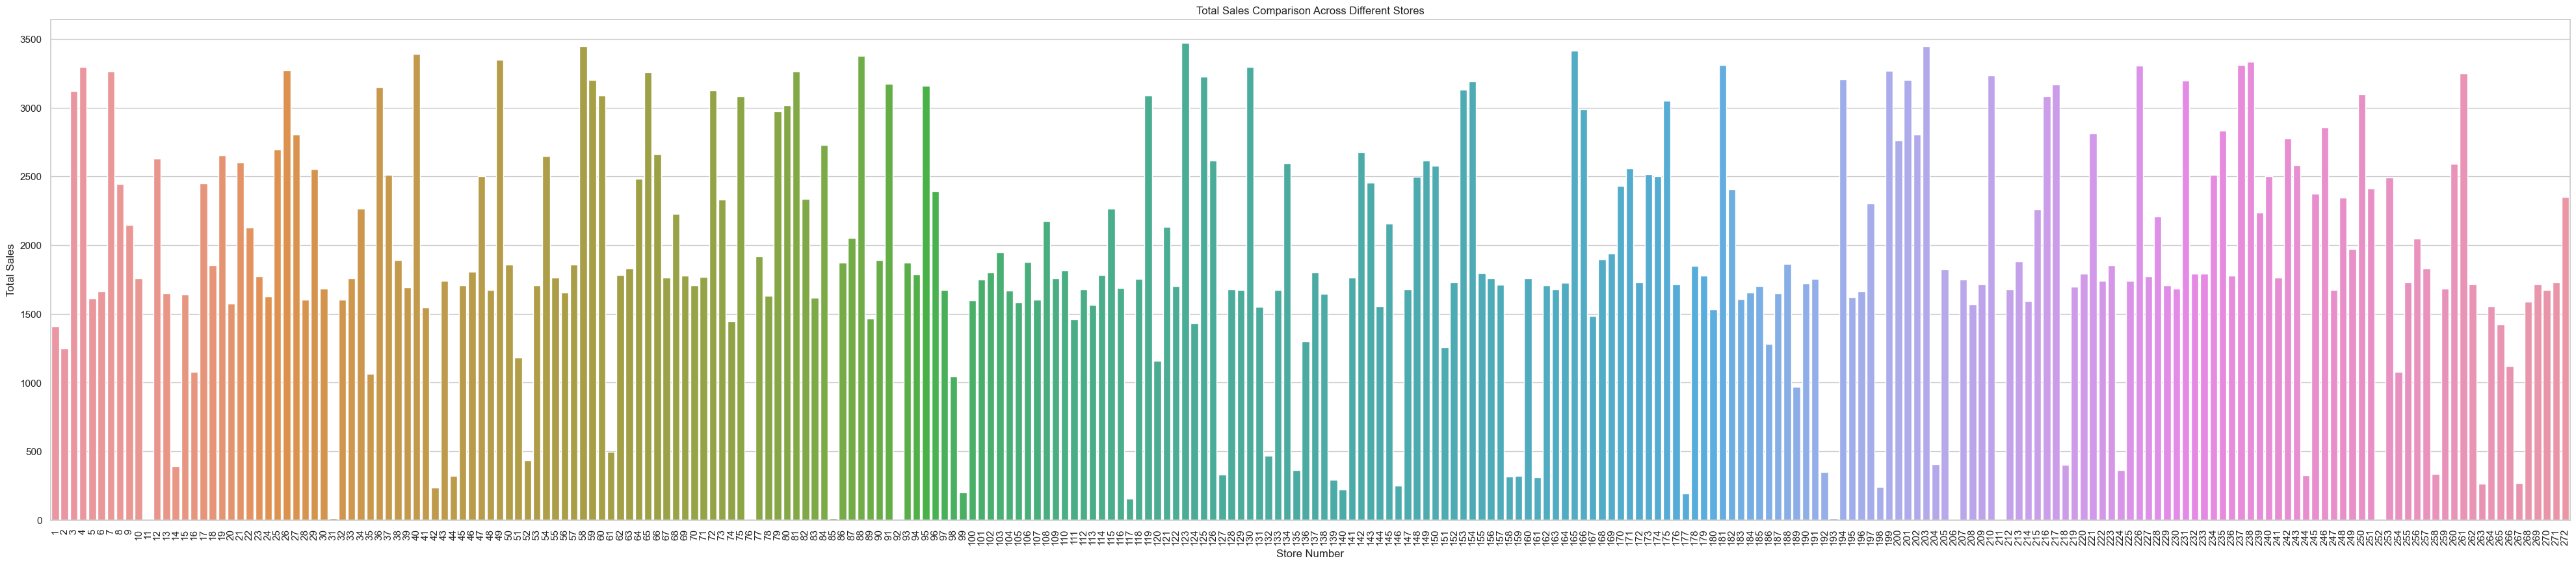

In [122]:
plt.figure(figsize=(50, 10))
sns.barplot(x='Store_Number', y='Total_Sales', data=store_sales)
plt.title('Total Sales Comparison Across Different Stores')
plt.xlabel('Store Number')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()

### Observation and Summanry 
The Total Revenue was gradually decreasing by every month and highest revenue achieved in the jan-2023 ||The Total Quantity was gradually decreasing by every month and highest Quantity sold in the  Jan-2023 || The highest Revenue generated  Category is   Chips followed by kittle || The highest Revenue generated   by OLDER SINGLES/COUPLES, RETIREES  by Life stage and Mainstream customer || store wise sales has be analysed hight revinue genrated from store_num 123